## Eigenfaces and Face reconstruction

Load faces.mat. This contains the matrix X with 5000 rows and 1024 columns. The columns are 
the rolled-out 32x32 pixel values of a face image. Try to reshape one row data into 32x32 matrix 
and plot the image using a grayscale colormap. The first 100 faces are shown below.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io

In [3]:
mat_contents = scipy.io.loadmat('../raw-data/faces.mat')
mat_contents.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [4]:
faces = mat_contents['X']

In [5]:
def print_face(matrix, row_size=1, column_size=1):
    px = 1/plt.rcParams['figure.dpi']  # pixel in inches
    plt.rcParams['figure.figsize'] = [32*px*row_size, 32*px*column_size]
    plt.rcParams.update({'font.size': 18*px})
    plt.rcParams['figure.constrained_layout.use'] = True
            
    img = plt.imshow(matrix)
    img.set_cmap('gray')
    plt.axis('off')
    plt.show()

In [295]:
def print_faces(faces,N = 100, column_size = 10,n = 32,m = 32):
    row_size = int(N/column_size)
    count = 0
    allPersons = np.zeros((32*row_size,32*column_size))
    while count < N:
        for i in range(row_size):
            for j in range(column_size):
                allPersons[i*n : (i+1)*n, j*m : (j+1)*m] = faces[count,:].reshape(n,m).T
                count += 1

    px = 1/plt.rcParams['figure.dpi']  # pixel in inches
    plt.rcParams['figure.figsize'] = [n*px*row_size, m*px*column_size]
    plt.rcParams.update({'font.size': 18*px})
    plt.rcParams['figure.constrained_layout.use'] = True
            
    img = plt.imshow(allPersons)
    img.set_cmap('gray')
    plt.axis('off')
    plt.show()


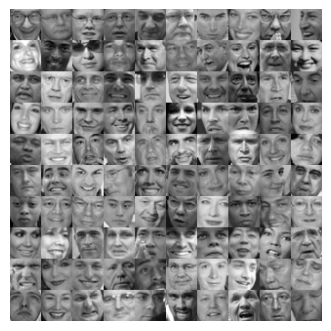

In [65]:
print_faces(faces, N=100)

### SVD on X

Perform SVD on X, identify the eigenfaces and plot the first few of them. Note that these 
eigenvectors correspond to eigenvalues with large values which together explains most of the 
variation in the data. Below are the first 36 eigenfaces. 

In [206]:
#I'll be using 70-30 split
indices = np.random.permutation(faces.shape[0])
training_idx, test_idx = indices[:70], indices[70:]
training_faces, test_faces = faces[training_idx,:], faces[test_idx,:]

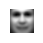

In [213]:
average_face = np.mean(faces, axis=0)
print_face(np.reshape(average_face,(32,32)).T)

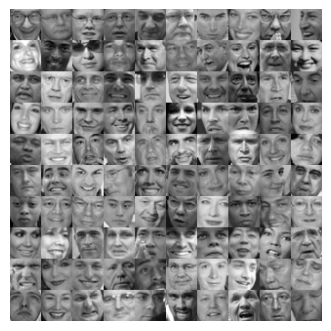

In [297]:
X = faces
print_faces(X, N=100)

In [298]:
def sv_decomposition(A):
    # Compute the eigenvalues and eigenvectors of A^TA
    ATA = np.dot(A.T, A)
    eigenvalues_ATA, V = np.linalg.eigh(ATA)
    
    # Sort eigenvalues and eigenvectors
    idx = np.argsort(eigenvalues_ATA)[::-1]
    eigenvalues_ATA = eigenvalues_ATA[idx]
    V = V[:, idx]
    
    # Compute the singular values
    S = np.sqrt(eigenvalues_ATA)
    
    # Compute the eigenvectors of AA^T
    AAT = np.dot(A, A.T)
    eigenvalues_AAT, U = np.linalg.eigh(AAT)
    
    # Sort eigenvalues and eigenvectors
    idx = np.argsort(eigenvalues_AAT)[::-1]
    U = U[:, idx]
    
    return U, S, V.T

In [320]:
# Perform SVD
U, S, Vt = sv_decomposition(X.T)
#U, S, Vt = np.linalg.svd(X.T)

C:\Users\Jouh\AppData\Local\Temp\ipykernel_1664\2511190640.py:12: RuntimeWarning: invalid value encountered in sqrt
  S = np.sqrt(eigenvalues_ATA)


### a. Observe what features are represented by the first few eigenfaces. 

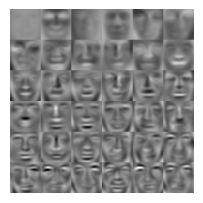

In [322]:
print_faces(U.T, N=36, column_size=6)

For the first pictures presented by eigenfaces:
- First Eigenface: Represents the overall average lighting and shadow patterns in the faces.
- Second Eigenface: Captures variations in the overall horizontal features of the faces, such as the position of the eyes and width of the face.
- Third Eigenface: Highlights the vertical features, such as the position of the mouth and height of the face.
- Subsequent Eigenfaces: Capture more localized features such as the presence and shape of facial features (e.g., nose, mouth, eyes) and other finer details.




### b. Discuss how dimensionality reduction is performed and what is the rationale of doing 
dimensionality reduction. 

Dimensionality Reduction Using PCA:
Dimensionality reduction is performed using Principal Component Analysis (PCA), which involves the following steps:

Standardization: Normalize the data to have zero mean and unit variance.
Covariance Matrix Computation: Calculate the covariance matrix of the standardized data.
Eigen Decomposition: Perform eigen decomposition on the covariance matrix to obtain eigenvalues and eigenvectors.
Principal Components: Select the top-k eigenvectors corresponding to the largest eigenvalues. These eigenvectors are the principal components that represent the new feature space.
Rationale for Dimensionality Reduction:

Noise Reduction: Reduces the impact of noise in the data by focusing on the components with the most significant variance.
Computational Efficiency: Reduces the computational cost and storage requirements by lowering the number of features.
Data Visualization: Simplifies the visualization of high-dimensional data by reducing it to two or three dimensions.
Improved Performance: Can improve the performance of machine learning algorithms by eliminating redundant and less informative features.


### c. Discuss how compression is achieved using SVD. Reconstruct the faces using the first k eigenfaces and compute the error of reconstruction averaged over all the faces. Plot the average reconstruction error versus k from 1 to 100. 